In [1]:
import numpy as np

In [39]:
from keras.utils import to_categorical,np_utils
from keras.models import Sequential,load_model
from keras.layers import Dense, LSTM, Activation,Dropout,Masking, Embedding
from keras import optimizers
from  keras.callbacks import ModelCheckpoint,EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.image as pimg

In [67]:
def loss_plot(self):
    iters = range(len(self.epoch))
    plt.figure()
    # acc
    plt.plot(iters, self.history['acc'], 'r', label='train acc')
    # loss
    plt.plot(iters, self.history['loss'], 'g', label='train loss')
    
    # val_acc
    plt.plot(iters, self.history['val_acc'], 'b', label='val acc')
    # val_loss
    plt.plot(iters, self.history['val_loss'], 'k', label='val loss')
    plt.grid(True)
    plt.ylim(0,1.2)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.legend(loc="upper right")
    plt.savefig('loss of lstm all.png', dpi=400)
    sns.plt.show()

In [4]:
zip_data_01=np.load('D:\\GitHub\\Neural-Network-Theory-and-Applications-Homework-SJTU2018\\Homework Assignment 4\\data_used\\01.npz')
files_in_zip_01 = zip_data_01.keys()
zip_data_02=np.load('D:\\GitHub\\Neural-Network-Theory-and-Applications-Homework-SJTU2018\\Homework Assignment 4\\data_used\\02.npz')
files_in_zip_02 = zip_data_02.keys()
zip_data_03=np.load('D:\\GitHub\\Neural-Network-Theory-and-Applications-Homework-SJTU2018\\Homework Assignment 4\\data_used\\03.npz')
files_in_zip_03 = zip_data_03.keys()
label01= np.load('D:\\GitHub\\Neural-Network-Theory-and-Applications-Homework-SJTU2018\\Homework Assignment 4\\data_used\\label.npy')

下一个cell：数据预处理，将01.npz\02.npz\03.npz数据集变成（15,265,310）的形式，长度不够265的补零
也就是说，将变长序列变为定长序列，
变形方法：https://stackoverflow.com/questions/35751306/python-how-to-pad-numpy-array-with-zeros 
行为解释：https://www.cnblogs.com/leeshum/p/6089286.html

In [5]:
data01=np.zeros((15,265,310))
for i in range(15):
    for j in range(265):
        if j < zip_data_01[files_in_zip_01[i]].shape[1]:
            data01[i,j,:]=zip_data_01[files_in_zip_01[i]][:,j,:].reshape(310)
        else:
            data01[i,j,:]=np.zeros(310)
data01/=31

In [6]:
data02=np.zeros((15,265,310))
for i in range(15):
    for j in range(265):
        if j < zip_data_02[files_in_zip_02[i]].shape[1]:
            data02[i,j,:]=zip_data_02[files_in_zip_02[i]][:,j,:].reshape(310)
        else:
            data02[i,j,:]=np.zeros(310)
data02/=31

In [7]:
data03=np.zeros((15,265,310))
for i in range(15):
    for j in range(265):
        if j < zip_data_03[files_in_zip_03[i]].shape[1]:
            data03[i,j,:]=zip_data_03[files_in_zip_03[i]][:,j,:].reshape(310)
        else:
            data03[i,j,:]=np.zeros(310)
data03/=31

In [15]:
x_train_1=data01[:9,:,:]
x_test_1=data01[9:,:,:]
x_train_2=data02[:9,:,:]
x_test_2=data02[9:,:,:]
x_train_3=data03[:9,:,:]
x_test_3=data03[9:,:,:]
x_train= np.append(np.append(x_train_1, x_train_2, axis = 0), x_train_3, axis = 0)
x_test= np.append(np.append(x_test_1, x_test_2, axis = 0), x_test_3, axis = 0)
y_train=label01[:9]
y_train=np.append(np.append(y_train,y_train),y_train)
y_test=label01[9:]
y_test=np.append(np.append(y_test,y_test),y_test)
y_train = np_utils.to_categorical(y_train, num_classes=3)
y_test = np_utils.to_categorical(y_test, num_classes=3)

In [92]:
model = Sequential()
    #model.add(Embedding(81250, 128, mask_zero=True))
model.add(Masking(mask_value=0,input_shape=(265, 310)))
model.add(LSTM(128,return_sequences=True))#
#model.add(Activation('relu'))
model.add(LSTM(128))
#model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))
RMS = optimizers.RMSprop(lr=1e-5)
model.compile(optimizer=RMS,
      loss='categorical_crossentropy',
      metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_7 (Masking)          (None, 265, 310)          0         
_________________________________________________________________
lstm_13 (LSTM)               (None, 265, 310)          770040    
_________________________________________________________________
lstm_14 (LSTM)               (None, 128)               224768    
_________________________________________________________________
dense_8 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_9 (Dense)              (None, 3)                 99        
Total params: 999,035
Trainable params: 999,035
Non-trainable params: 0
_________________________________________________________________
None


In [73]:
# checkpoint
filepath="model-all-best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')
earlystop=EarlyStopping(monitor='val_loss', patience=20, verbose=2, mode='auto')

In [88]:
#load a model
model=load_model('D:/GitHub/Neural-Network-Theory-and-Applications-Homework-SJTU2018/Homework Assignment 4/model-all-best.hdf5')
print(model.summary())

18/18 [==============================] - 3s 150ms/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_6 (Masking)          (None, 265, 310)          0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 265, 310)          770040    
_________________________________________________________________
lstm_12 (LSTM)               (None, 64)                96000     
_________________________________________________________________
dense_6 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 99        
Total params: 868,219
Trainable params: 868,219
Non-trainable params: 0
_________________________________________________________________
None


In [93]:
print(model.evaluate(x_test,y_test, batch_size=18, verbose=1))

18/18 [==============================] - 5s 251ms/step
[1.1179307699203491, 0.27777779102325439]


In [90]:
RMS = optimizers.RMSprop(lr=1e-5)
model.compile(optimizer=RMS,
      loss='categorical_crossentropy',
      metrics=['accuracy'])

In [94]:
print('Training ------------')
model_history=model.fit(x_train, y_train,
          validation_data=(x_test,y_test),epochs=300,verbose=2,
          batch_size=18,callbacks=[checkpoint])

Training ------------
Train on 27 samples, validate on 18 samples
Epoch 1/300
Epoch 00001: val_loss did not improve
 - 10s - loss: 1.1102 - acc: 0.2963 - val_loss: 1.1003 - val_acc: 0.3889
Epoch 2/300
Epoch 00002: val_loss did not improve
 - 5s - loss: 1.1050 - acc: 0.3333 - val_loss: 1.1101 - val_acc: 0.4444
Epoch 3/300
Epoch 00003: val_loss did not improve
 - 5s - loss: 1.0930 - acc: 0.3704 - val_loss: 1.0970 - val_acc: 0.4444
Epoch 4/300
Epoch 00004: val_loss did not improve
 - 5s - loss: 1.0949 - acc: 0.3704 - val_loss: 1.0896 - val_acc: 0.4444
Epoch 5/300
Epoch 00005: val_loss did not improve
 - 4s - loss: 1.0775 - acc: 0.4074 - val_loss: 1.0873 - val_acc: 0.3889
Epoch 6/300
Epoch 00006: val_loss did not improve
 - 5s - loss: 1.0693 - acc: 0.4074 - val_loss: 1.0872 - val_acc: 0.3889
Epoch 7/300
Epoch 00007: val_loss did not improve
 - 4s - loss: 1.0678 - acc: 0.3704 - val_loss: 1.0845 - val_acc: 0.3889
Epoch 8/300
Epoch 00008: val_loss did not improve
 - 5s - loss: 1.0633 - acc: 0

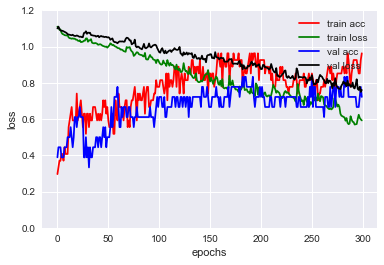

In [95]:
loss_plot(model_history)